# Modeling

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import plot_tree

pd.set_option('display.max_colwidth', None)

In [68]:
plants = pd.read_csv('../data/data_cleaned/plants.csv')

In [69]:
plants.head()

,id,created_utc,title,self_text,comments,score,upvote_ratio,subreddit
0,uw3f46,1.653321e+09,I feel attacked.,no_text,793,63651,0.94,1
1,v4z9xu,1.654380e+09,The liberals are trying to make my plants gay!!,no_text,1281,54217,0.82,1
2,q0hqvn,1.633268e+09,This was supposed to be a plant progress post showing off my oxalis but Henk stole the show,no_text,572,45198,0.96,1
3,i5rplr,1.596855e+09,My grandpa made me a plant stand 💖,no_text,451,40218,0.96,1
4,lkjvss,1.613414e+09,I let my Golden Pothos get outta hand for just this reason. It’s like a little jungle for him.,no_text,593,39723,0.98,1


In [70]:
plants.shape

(9271, 8)

In [71]:
X = plants['title']
y = plants['subreddit']

In [72]:
X.shape

(9271,)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [74]:
X_train.shape

(6953,)

In [75]:
cvec = CountVectorizer(
)

In [76]:
cvec.fit(X_train)

CountVectorizer()

In [77]:
X_train_cvec = cvec.transform(X_train)

In [78]:
cvec.get_feature_names_out()

array(['00', '000', '00pm', ..., 'zuccini', 'zuchini', 'zz'], dtype=object)

In [79]:
X_train_cvec

<6953x6459 sparse matrix of type '<class 'numpy.int64'>'
	with 62426 stored elements in Compressed Sparse Row format>

In [80]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('et', ExtraTreesClassifier(random_state=21))
])

In [81]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec', CountVectorizer()),
                ('et', ExtraTreesClassifier(random_state=21))])

In [82]:
pipe.score(X_train, y_train)

0.9953976700704732

In [83]:
pipe.score(X_test, y_test)

0.8390854184641933

In [84]:
1 - y.mean()

0.4891597454427785

In [85]:
pipe.get_params()

{'memory': None,
 'steps': [('cvec', CountVectorizer()),
  ('et', ExtraTreesClassifier(random_state=21))],
 'verbose': False,
 'cvec': CountVectorizer(),
 'et': ExtraTreesClassifier(random_state=21),
 'cvec__analyzer': 'word',
 'cvec__binary': False,
 'cvec__decode_error': 'strict',
 'cvec__dtype': numpy.int64,
 'cvec__encoding': 'utf-8',
 'cvec__input': 'content',
 'cvec__lowercase': True,
 'cvec__max_df': 1.0,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__preprocessor': None,
 'cvec__stop_words': None,
 'cvec__strip_accents': None,
 'cvec__token_pattern': '(?u)\\b\\w\\w+\\b',
 'cvec__tokenizer': None,
 'cvec__vocabulary': None,
 'et__bootstrap': False,
 'et__ccp_alpha': 0.0,
 'et__class_weight': None,
 'et__criterion': 'gini',
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__max_leaf_nodes': None,
 'et__max_samples': None,
 'et__min_impurity_decrease': 0.0,
 'et__min_samples_leaf': 1,
 'et__min_samples_split': 2,
 'et__min_weight_fra

In [86]:
pipe_params = {
    'cvec__max_features': [None],
    'cvec__min_df': [1],
    'cvec__max_df': [.9],
    'cvec__ngram_range': [(1,1)],
    'cvec__stop_words': [None],
    'et__n_estimators': [500],
    'et__max_features': ['sqrt'],
    'et__max_depth': [None],
    'et__min_samples_leaf': [1],
    'et__bootstrap': [False],
    'et__oob_score': [False]
}

In [87]:
gs = GridSearchCV(pipe,
                  param_grid = pipe_params,
                  cv = 5,
                  n_jobs=8
)

In [88]:
%%time
gs.fit(X_train, y_train)

CPU times: user 34.9 s, sys: 2.92 s, total: 37.9 s
Wall time: 1min 9s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('et',
                                        ExtraTreesClassifier(random_state=21))]),
             n_jobs=8,
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [None],
                         'cvec__min_df': [1], 'cvec__ngram_range': [(1, 1)],
                         'cvec__stop_words': [None], 'et__bootstrap': [False],
                         'et__max_depth': [None], 'et__max_features': ['sqrt'],
                         'et__min_samples_leaf': [1], 'et__n_estimators': [500],
                         'et__oob_score': [False]})

In [89]:
gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': None,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': None,
 'et__bootstrap': False,
 'et__max_depth': None,
 'et__max_features': 'sqrt',
 'et__min_samples_leaf': 1,
 'et__n_estimators': 500,
 'et__oob_score': False}

In [90]:
gs.score(X_train, y_train)

0.9953976700704732

In [91]:
gs.score(X_test, y_test)

0.8459879206212252

In [92]:
preds = gs.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

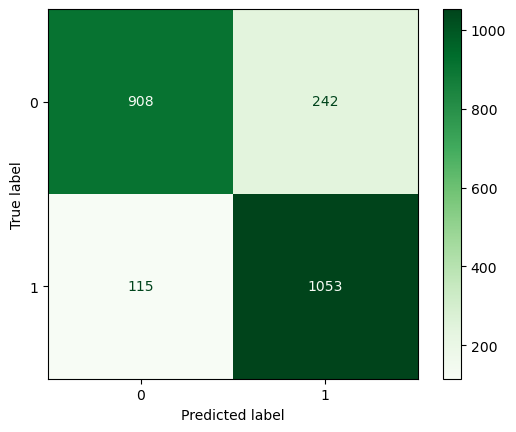

In [93]:
ConfusionMatrixDisplay.from_estimator(gs, X_test, y_test, cmap='Greens');

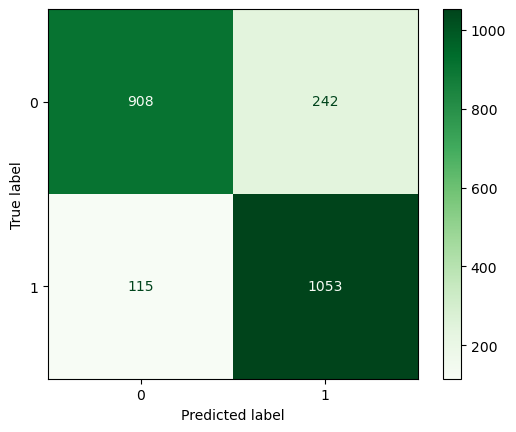

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, preds, cmap='Greens');

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds, digits = 5))

              precision    recall  f1-score   support

           0    0.88759   0.78957   0.83571      1150
           1    0.81313   0.90154   0.85505      1168

    accuracy                        0.84599      2318
   macro avg    0.85036   0.84555   0.84538      2318
weighted avg    0.85007   0.84599   0.84546      2318



In [96]:
misclassified_indices = (preds != y_test)

In [97]:
misclassified_indices

5799    False
3599     True
4819    False
966     False
448     False
        ...  
4215    False
4852     True
4618    False
1474    False
6695    False
Name: subreddit, Length: 2318, dtype: bool

In [98]:
misclassified_df = pd.DataFrame({
    'Misclassified_Posts': X_test[misclassified_indices],
    'True Labels': y_test[misclassified_indices],
    'Predicted_Labels': preds[misclassified_indices]
})

In [99]:
misclassified_df.head(50)

,Misclassified_Posts,True Labels,Predicted_Labels
3599,Any idea what this is ?,1,0
4847,Update on my Ohio pineapple,0,1
6600,so proud of my babies...,0,1
8203,Chunky potting mix,0,1
5622,ain’t stupid if it works,0,1
6133,images for my grandma :) she no longer walks so I find flowers for her,0,1
5030,Thought this sub would appreciate this post,0,1
5202,Before and after. Really proud.,0,1
6682,"I just started to learn to prune, how is it ? Any thoughts on improvements?",0,1
5713,Social distancing in my safe room.,0,1


In [111]:
best_estimator = gs.best_estimator_

In [112]:
et_classifier = best_estimator.named_steps['et']

In [113]:
feature_importances = et_classifier.feature_importances_

In [118]:
importance_df = pd.DataFrame({
    'feature': cvec.get_feature_names_out(),  # Replace with your feature names
    'importance': feature_importances
})

In [132]:
importance_df = importance_df.sort_values(by='importance', ascending=False).head(20)

In [133]:
importance_df

,feature,importance
2314,garden,0.031607
2590,harvest,0.014327
3603,monstera,0.014139
4226,plant,0.012086
4236,plants,0.007548
2320,gardening,0.007007
5844,tomato,0.007006
3680,my,0.006652
5846,tomatoes,0.006379
5917,tree,0.005836


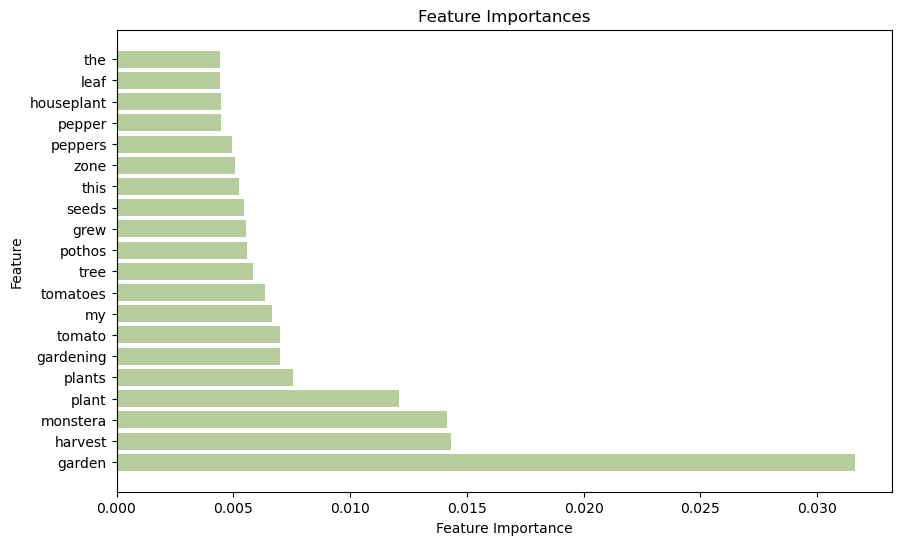

In [135]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='#b7cc9d')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances');

In [140]:
decision_tree_classifier = best_estimator.named_steps['ExtraTreesClassifier']

# Get the feature names from CountVectorizer (replace 'cvec' with the actual name)
feature_names = best_model.named_steps['cvec'].get_feature_names_out()

plt.figure(figsize=(16, 8))
plot_tree(
    decision_tree_classifier,
    feature_names=feature_names,
    class_names=['Houseplants', 'Gardening'],
    filled=True
)
plt.show()

KeyError: 'ExtraTreesClassifier'